# Linear regresion using python
## Meaning of Regression
Regression attempts to predict one dependent variable (usually denoted by Y) and a series of other changing variables (known as independent variables, usually denoted by X).
## Linear Regression
Linear Regression is a way of predicting a response Y on the basis of a single predictor variable X. It is assumed that there is approximately a linear relationship between X and Y. Mathematically, we can represent this relationship as:
\begin{equation}Y \approx \rho + \beta X + \epsilon \end{equation}
where $\rho$ and $\beta$ are two unknown constants that represent intercept and slope terms in the linear model and $\epsilon$ is the error in the estimation.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline
#import sklearn.model_selection.train_test_split# as train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
USAhousing = pd.read_csv('DATA/50W/D20190212e.txt',
                         names=['Time','Temperature','RH','Voltage','Current'])
USAhousing.head()
USAhousing.info()
USAhousing.describe()
USAhousing.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 5 columns):
Time           1177 non-null int64
Temperature    1177 non-null float64
RH             1177 non-null float64
Voltage        1177 non-null float64
Current        1177 non-null float64
dtypes: float64(4), int64(1)
memory usage: 46.1 KB


Index(['Time', 'Temperature', 'RH', 'Voltage', 'Current'], dtype='object')

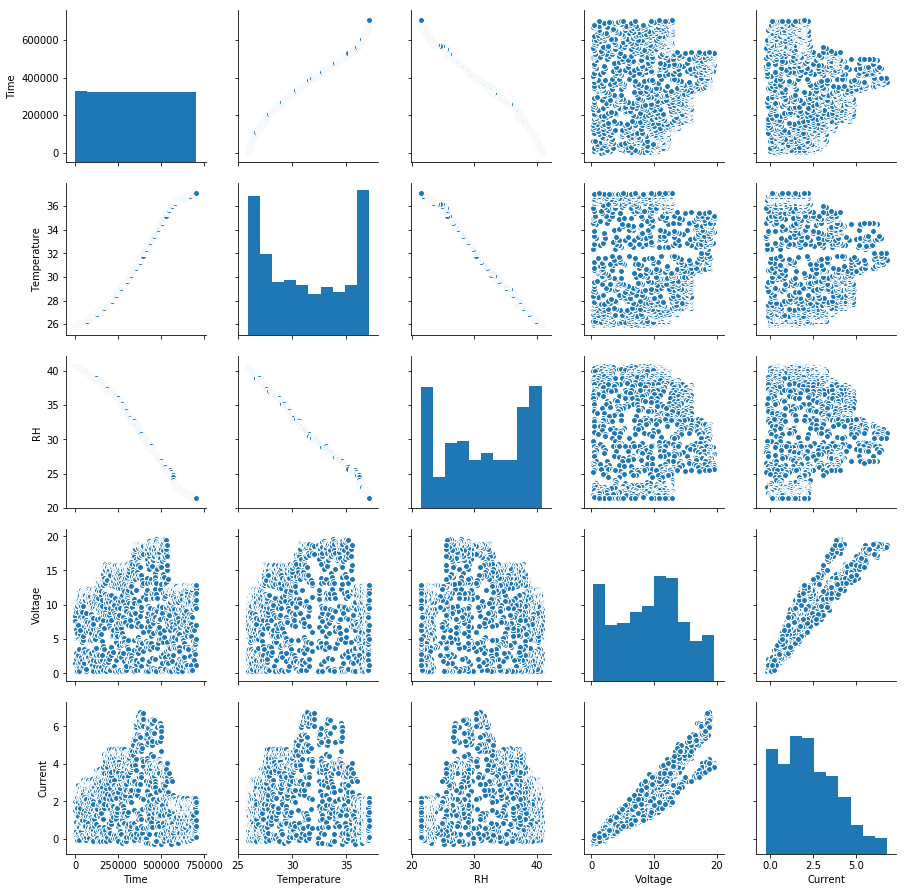

In [6]:
sns.pairplot(USAhousing)

C:\Users\Ghiordy F. Contreras\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


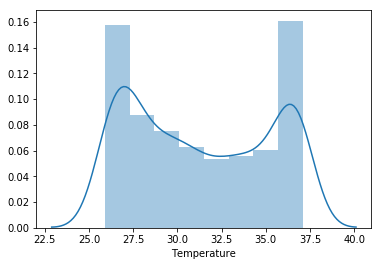

In [7]:
sns.distplot(USAhousing['Temperature'])

In [8]:
USAhousing.corr()

,Time,Temperature,RH,Voltage,Current
Time,1.000000,0.990875,-0.994701,0.061691,-0.126531
Temperature,0.990875,1.000000,-0.997939,0.050694,-0.154904
RH,-0.994701,-0.997939,1.000000,-0.048776,0.152195
Voltage,0.061691,0.050694,-0.048776,1.000000,0.918255
Current,-0.126531,-0.154904,0.152195,0.918255,1.000000


In [28]:
X = USAhousing['Temperature']
y = USAhousing['RH']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [34]:
lm = LinearRegression()
lm.fit(X_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[35.7 26.6 36.7 33.7 34.5 26.2 29.2 36.6 31.5 34.3 30.  29.2 36.7 28.1
 32.9 34.8 31.6 33.3 33.  31.2 36.9 33.1 27.3 26.9 36.5 34.7 26.9 36.4
 26.4 34.9 34.6 35.6 26.  36.9 36.4 34.2 35.5 29.4 32.3 35.  35.4 33.
 28.2 29.  31.3 26.7 34.5 28.4 27.  29.3 35.8 36.9 28.9 30.5 36.2 33.5
 27.5 37.  27.5 36.9 28.2 36.3 26.2 36.8 30.4 36.7 26.2 28.1 26.8 37.
 26.2 27.2 27.1 31.4 32.1 29.4 36.1 35.2 35.7 34.9 29.9 30.6 29.5 31.4
 26.  30.  31.4 29.  27.7 28.4 37.  36.4 29.5 36.5 36.3 27.7 37.  27.3
 32.7 26.1 36.5 30.8 26.8 26.  32.6 36.9 36.7 36.6 36.9 30.4 33.9 27.4
 36.6 32.1 30.1 27.7 25.9 27.6 35.  36.2 26.2 30.6 26.9 32.7 30.5 34.6
 26.5 25.9 28.7 30.1 37.  36.7 26.7 37.  33.1 37.  30.8 34.  35.4 26.1
 34.1 27.4 26.2 36.2 27.2 32.2 27.1 37.  30.6 35.  36.4 37.  29.1 36.3
 36.7 27.3 27.8 30.7 31.7 36.8 26.1 28.5 34.  26.2 36.5 31.3 36.4 29.3
 32.3 26.7 30.5 26.4 37.1 27.8 26.4 35.2 26.  36.7 30.  28.9 37.  26.4
 35.8 29.4 27.5 34.6 26.1 37.  26.7 36.2 35.4 26.4 26.1 29.3 36.7 33.7
 32.  36.8 26.1 33.1 27.3 36.3 37.  27.3 26.6 27.2 27.8 29.  29.  36.5
 28.3 29.4 37.  29.6 28.1 30.4 31.2 35.2 37.  27.4 26.7 36.3 29.8 30.3
 28.5 35.2 26.1 36.6 33.7 26.6 36.6 34.4 35.  33.7 33.5 37.  32.8 27.7
 30.2 27.2 31.2 36.7 33.1 36.9 31.3 29.1 32.8 28.3 25.9 31.  28.  31.8
 27.9 36.5 35.5 34.9 31.8 26.6 32.2 34.  27.9 30.7 35.1 27.4 27.6 32.8
 35.2 27.5 34.8 36.5 29.2 35.4 26.7 36.6 27.6 36.7 29.4 28.2 28.8 34.2
 26.7 35.6 27.7 27.4 30.  34.1 26.7 36.8 26.2 36.7 28.3 36.9 33.8 35.9
 28.9 26.3 37.  28.  34.4 31.5 37.  32.3 36.6 31.  35.2 32.7 33.4 26.7
 30.  28.3 31.5 32.5 26.2 35.7 33.9 27.4 31.1 29.7 30.7 36.6 32.7 26.9
 36.9 30.4 26.2 35.9 30.7 26.1 27.5 33.1 26.8 35.4 36.5 28.9 27.5 26.5
 32.2 29.1 36.5 32.2 26.5 27.8 36.6 36.9 26.1 31.6 26.1 28.2 36.6 36.9
 27.6 33.9 31.3 27.1 36.8 32.  28.7 34.7 37.  31.6 29.8 32.2 26.8 27.
 36.3 27.  27.3 32.8 25.9 29.  33.2 36.5 33.2 36.9 26.9 32.2 25.9 34.2
 26.6 33.2 36.8 36.8 25.9 34.9 26.2 37.  36.8 29.1 36.  32.8 35.1 26.3
 26.2 27.9 36.7 32.7 35.6 36.7 37.1 26.9 30.  36.6 28.5 28.3 29.5 26.6
 37.  29.8 33.9 36.4 37.  27.5 26.6 34.6 36.7 27.6 36.3 29.7 36.6 37.1
 36.7 33.2 26.7 28.8 27.2 31.1 26.1 28.7 34.6 36.4 26.4 28.5 31.  27.4
 31.5 29.7 30.8 28.3 32.2 33.1 36.4 29.  37.  31.6 36.8 35.8 37.  27.6
 28.4 30.3 28.7 32.6 26.3 36.2 27.1 26.  36.9 30.4 36.9 29.  33.6 26.6
 32.9 26.  35.6 27.5 30.8 27.8 32.8 37.  28.2 31.5 36.2 29.8 36.4 37.
 36.4 29.2 36.9 26.4 31.1 36.8 30.8 27.2 35.9 33.5 30.7 31.6 30.9 36.9
 29.1 28.6 28.6 30.7 33.4 27.2 26.5 33.4 35.1 28.  32.5 36.8 31.1 29.5
 27.  34.6 27.6 29.9 26.2 36.7 32.1 26.7 26.3 27.1 32.4 35.1 26.4 34.2
 26.  29.1 30.4 30.3 25.9 31.5 29.6 28.  34.6 30.6 26.3 32.  33.3 34.3
 35.4 28.2 26.9 34.7 25.9 29.3 37.1 27.  30.2 26.6 35.4 37.  36.6 36.8
 28.9 36.6 28.  29.6 37.1 35.2 26.8 33.1 26.9 36.9 37.  26.3 26.3 35.8
 27.2 26.  30.4 28.  36.9 30.8 26.2 30.9 32.7 31.8 30.5 27.1 29.4 32.
 36.5 29.6 36.6 27.1 36.6 26.3 26.8 25.9 36.3 26.5 30.4 27.3 34.3 31.8
 29.6 26.2 26.4 34.2 26.1 31.7 36.6 31.1 34.3 27.  37.  27.6 34.3 34.5
 36.3 28.7 27.4 27.2 26.1 34.9 30.5 31.8 35.5 32.6 30.8 26.2 32.7 27.
 36.4 27.6 25.9 30.2 33.9 32.8 28.  30.1 29.4 26.  37.  34.  29.8 26.1
 36.2 29.2 27.  28.  26.2 27.  27.3 36.2 31.5 26.8 29.8 32.8 27.9 34.8
 25.9 30.3 37.  28.5 29.8 35.6 26.3 37.  36.6 26.9 33.2 36.2 26.1 28.2
 35.8 29.7 36.6 30.3 28.8 29.7 35.5 32.2 36.6 26.9 33.5 27.4 28.1 29.9
 35.6 31.2 33.3 29.  35.6 30.  34.5 37.  36.4 27.1 26.3 35.5 27.9 36.9
 27.4 26.1 35.2 28.2 26.5 31.3 26.1 26.1 29.5 35.6 36.6 37.  33.1 27.7
 36.1 30.6 36.4 26.2 31.  35. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [35]:
predictions = lm.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
plt.scatter(y_test,predictions)